<a href="https://colab.research.google.com/github/madhulathachavali/AIML/blob/main/Breast_Cancer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim of the project to analyze breast cancer dataset using exploratory data analysis and principal component analysis 

Data Source: UIC machine learning data base.This dataset has 11 atrributes including patient ID and class.

Independent Variables: ClumpThickness	Cell Size	Cell Shape	Marginal Adhesion	Single Epithelial Cell Size	Bare Nuclei	Normal Nucleoli	Bland Chromatin	Mitoses	
Target Variable: Class (2 -Benign and 4 -Malignant)

**Import libraries and Load the Data**

In [82]:
# Load the necessary packages
import numpy as np                                    
import pandas as pd 
import seaborn as sns # statistical plots
import matplotlib.pyplot as plt #importing plotting libraries
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [83]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Change directory when needed
data_path ="/content/drive/My Drive/Data/bc2.csv"

In [85]:
data=pd.DataFrame(pd.read_csv(data_path))

**Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis**

In [86]:
data.head(20)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [87]:
data.shape

(699, 11)

This dataset has 11 variables and 699 obervations including Patient ID and Class

In [88]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

Bare nuclei is taken as object type even though it has numerical values

In [89]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Check for missing value check, incorrect data, duplicate data and missing value imputation.**

In [90]:
data['Bare Nuclei'].unique() # '?' should be removed from Bare Nuclei column

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [91]:
# Check for missing value in any other column
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

There are no missing values in the data. We can impute barenuclei with '?' with highest class bare nuclei value.

In [92]:
# count the rows having ?
data[data['Bare Nuclei']=="?"].count()


ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [93]:
data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

16 values have '?' We can delete them as it forms roughly 2% of data.
For now, lets impute with highest Bare nuclei value class

In [94]:
# We would impute by using mode (we can also look for advane imputation such as knn imputation in fancyimpute package)
data['Bare Nuclei'].replace("?",'1', inplace=True)
data['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [95]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64') # change object data to int64 as it will be helpful for model building

In [96]:
# Checking for duplicate data
data.duplicated().sum()

9

In [97]:
# duplicated obervations
duplicates=data.duplicated()
data[duplicates]
# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [98]:
# Remove duplicate observations
data.drop_duplicates(subset = None, keep = 'first', inplace=True)

In [99]:
data.shape

(690, 11)

We have 690 obervations after dropping the duplicated observations

In [100]:
# Drop ID any it will not provide any information
data=data.drop(['ID'], axis=1)
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


**Bivariate analysis**

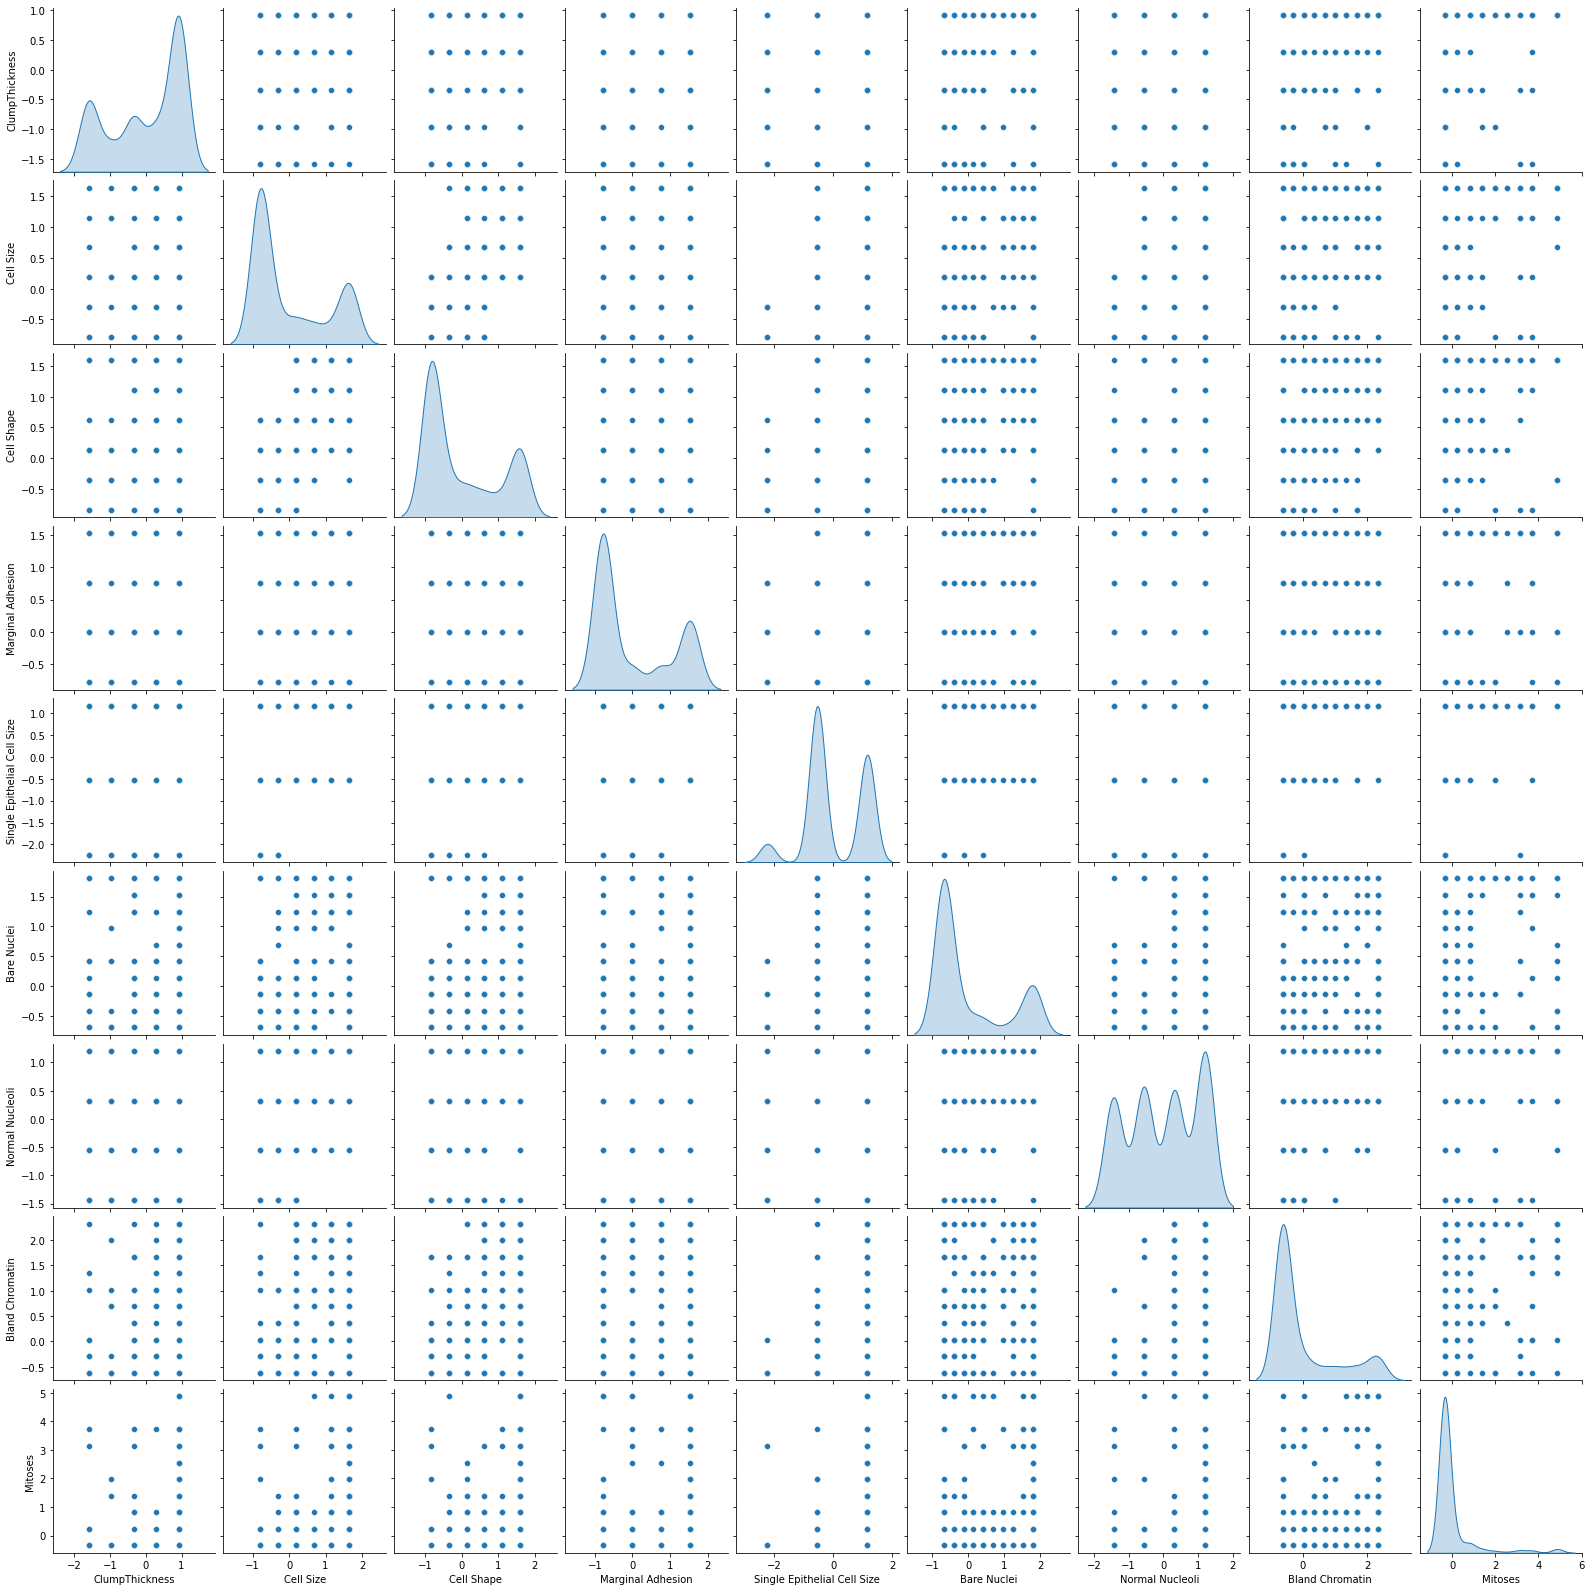

In [101]:
sns.pairplot(data_new,diag_kind='kde')

In [102]:
data.corr(method='pearson')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


Cell Size shows high significance with Cell shape (0.9), Marginal Adhesion (0.7), Single Epithelial Cell Size (0.7), Bare Nuclei (0.7), normal nucleoli (0.7), and bland chromatin (0.7)

In [103]:
data.value_counts(data["Class"])

Class
2    452
4    238
dtype: int64

Class 2 has twice the number of values compared to class 4. The dataset is imbalanced.

In [104]:
#Group few levels
pd.crosstab(data['Marginal Adhesion'], data['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


More number of observations seen in 1, 2 and 3. From point 4 onwards, less number of observations are seen. We can club all these obervations together as they seem not so common.

In [105]:
data['Marginal Adhesion'] = np.where(data['Marginal Adhesion'] >4, 4, data['Marginal Adhesion'])
data['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [106]:
pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


Similarly, group 4 onwards, Single Epithelial Cell Size with 4 and above can be clubbed. Other variables are also clubbed below 

In [107]:
data['Single Epithelial Cell Size'] = np.where(data['Single Epithelial Cell Size'] >3, 3, data['Single Epithelial Cell Size'])

In [108]:
pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,49,214


In [109]:
pd.crosstab(data['Normal Nucleoli'], data['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [110]:
# Clubbing levels 4 and above together
data['Normal Nucleoli'] = np.where(data['Normal Nucleoli'] >4, 4, data['Normal Nucleoli'])

In [111]:
data['Normal Nucleoli'].value_counts()

4    214
2    165
3    160
1    151
Name: Normal Nucleoli, dtype: int64

In [112]:
pd.crosstab(data['Bland Chromatin'], data['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [113]:
pd.crosstab(data['Mitoses'], data['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [114]:
# Clubbing levels 4 and above together
data['ClumpThickness'] = np.where(data['ClumpThickness'] >5, 5, data['ClumpThickness'])

In [115]:
pd.crosstab(data['ClumpThickness'], data['Class'])

Class,2,4
ClumpThickness,,
1,139,3
2,46,4
3,94,11
4,68,12
5,105,208


In [116]:
pd.crosstab(data['Cell Size'], data['Class'])

Class,2,4
Cell Size,,
1,374,4
2,37,8
3,27,24
4,9,31
5,0,30
6,2,25
7,1,18
8,1,28
9,1,5


In [117]:
# Clubbing levels 6 and above together
data['Cell Size'] = np.where(data['Cell Size'] >6, 6, data['Cell Size'])

In [118]:
# Clubbing levels 6 and above together
data['Cell Shape'] = np.where(data['Cell Shape'] >6, 6, data['Cell Shape'])

**Remove Outliers and scaling**

As all variables are on the same scale, we need not do scaling. As we are doing Principal component analysis, we will do scaling using z score


Lets separate independent and dependent variables

In [119]:
# independant variables
X=data.drop(['Class'], axis=1)
X.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,3,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,5,6,6,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [120]:
# the dependent variable
y = data[['Class']]

In [121]:
XScaled=X.apply(zscore)
XScaled.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.917458,-0.785487,-0.836975,-0.781803,-0.536685,-0.686858,0.322808,-0.615082,-0.344869
1,0.917458,0.670160,0.618939,1.530101,1.161998,1.803153,0.322808,-0.288866,-0.344869
2,-0.338586,-0.785487,-0.836975,-0.781803,-0.536685,-0.410190,0.322808,-0.615082,-0.344869
3,0.917458,1.640591,1.589548,-0.781803,1.161998,0.143146,0.322808,1.342211,-0.344869
4,0.289436,-0.785487,-0.836975,0.759466,-0.536685,-0.686858,0.322808,-0.615082,-0.344869


In [122]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.00145138 0.55142178 0.55800043 0.48229552 0.49000408 0.46388115
  0.44248112 0.44708461 0.24650196]
 [0.55142178 1.00145138 0.91237383 0.76294152 0.74179619 0.75303559
  0.71210558 0.74338474 0.43377375]
 [0.55800043 0.91237383 1.00145138 0.7331956  0.71792613 0.74650298
  0.69472835 0.72361295 0.39445405]
 [0.48229552 0.76294152 0.7331956  1.00145138 0.63617971 0.69693138
  0.60427482 0.61777172 0.34344107]
 [0.49000408 0.74179619 0.71792613 0.63617971 1.00145138 0.6348984
  0.57938679 0.62487917 0.34408238]
 [0.46388115 0.75303559 0.74650298 0.69693138 0.6348984  1.00145138
  0.64237847 0.57900023 0.34332099]
 [0.44248112 0.71210558 0.69472835 0.60427482 0.57938679 0.64237847
  1.00145138 0.60816743 0.30208069]
 [0.44708461 0.74338474 0.72361295 0.61777172 0.62487917 0.57900023
  0.60816743 1.00145138 0.42811085]
 [0.24650196 0.43377375 0.39445405 0.34344107 0.34408238 0.34332099
  0.30208069 0.42811085 1.00145138]]


In [123]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

Eigen Values

In [124]:
print(pca.explained_variance_)

[5.74253624 0.81449951 0.628298   0.42964521 0.42201179 0.3546523 ]


Eigen Vectors

In [125]:
print(pca.components_)

[[ 0.26918215  0.39181991  0.38480677  0.34818765  0.34087824  0.34731312
   0.33029627  0.33947578  0.20867062]
 [-0.22664607 -0.02251375 -0.06814565 -0.09996905 -0.07345119 -0.11406354
  -0.14036163  0.13698258  0.93627767]
 [-0.92181742  0.08015039  0.0592878   0.12345284  0.02241163  0.19040268
   0.22858051  0.10298816 -0.15956765]
 [ 0.02568127  0.01099793  0.0189691  -0.42205989 -0.00657473 -0.51109687
   0.36485254  0.63806248 -0.13863909]
 [ 0.12865441 -0.06682252 -0.0556139  -0.08277072 -0.59490641  0.21375475
   0.69501114 -0.25942784  0.13816976]
 [-0.03289446 -0.06662238 -0.07956896 -0.48924867  0.67614515  0.0633797
   0.31715163 -0.42019764  0.10219333]]


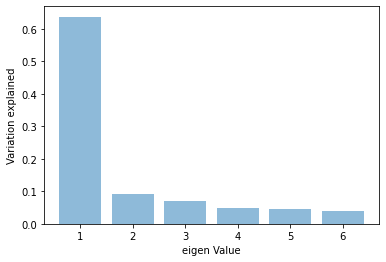

In [126]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

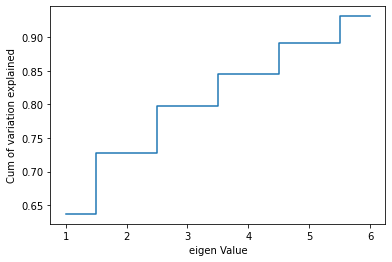

In [127]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Dimensionality Reduction

With 5 variables we can explain over 90% of the variation in the original data!

In [128]:
pca3 = PCA(n_components=5)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.26918215  0.39181991  0.38480677  0.34818765  0.34087824  0.34731312
   0.33029627  0.33947578  0.20867062]
 [-0.22664607 -0.02251375 -0.06814565 -0.09996905 -0.07345119 -0.11406354
  -0.14036163  0.13698258  0.93627767]
 [-0.92181742  0.08015039  0.0592878   0.12345284  0.02241163  0.19040268
   0.22858051  0.10298816 -0.15956765]
 [ 0.02568127  0.01099793  0.0189691  -0.42205989 -0.00657473 -0.51109687
   0.36485254  0.63806248 -0.13863909]
 [ 0.12865441 -0.06682252 -0.0556139  -0.08277072 -0.59490641  0.21375475
   0.69501114 -0.25942784  0.13816976]]
[0.63713486 0.09036879 0.06970971 0.04766917 0.04682224]


In [129]:
Xpca3

array([[-1.25074021, -0.38975457, -1.13215994,  0.4567226 ,  0.79051325],
       [ 2.23943298, -1.11696361, -0.09798887, -1.55107226, -0.14201893],
       [-1.49275424, -0.13663503,  0.07836089,  0.28306173,  0.68805683],
       ...,
       [ 3.35004215, -0.12969057, -0.04915027,  1.69900749, -0.59599783],
       [ 2.98132656, -0.81809844,  0.63581243,  0.46410229, -0.42311728],
       [ 2.85593245, -0.93902783,  0.62129808, -0.0935935 , -0.19471946]])

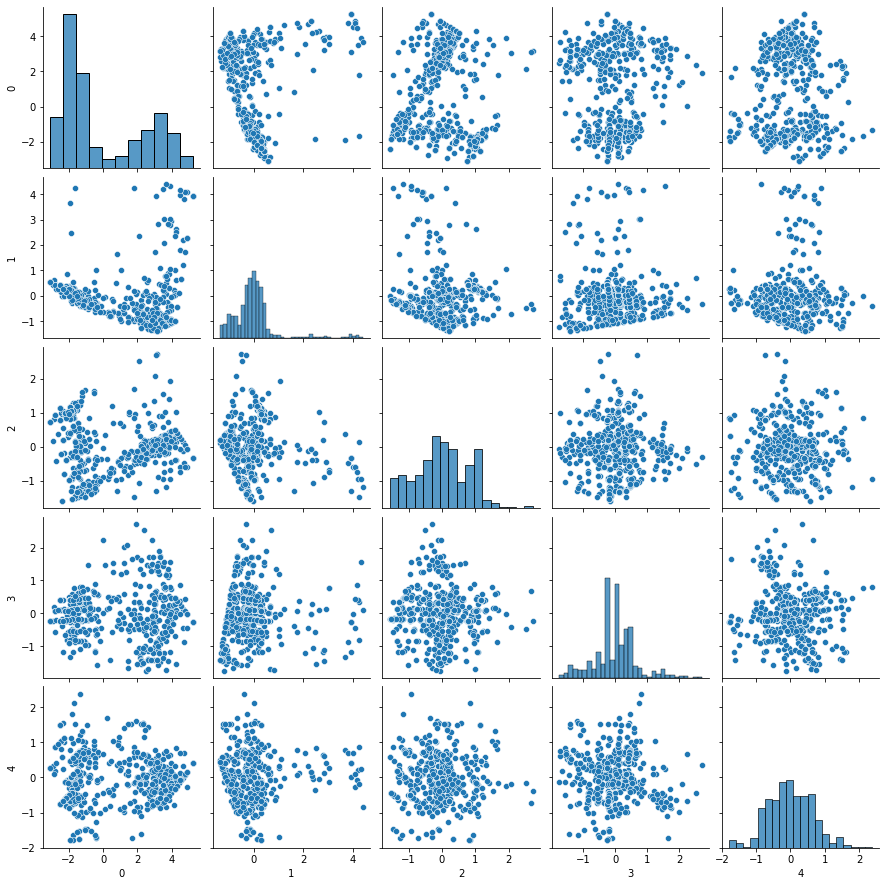

In [130]:
sns.pairplot(pd.DataFrame(Xpca3))

Fit Linear Model

Lets do two linear models. The first with all the 9 independent variables and the second with only the 5 new variables constructed using PCA.

In [131]:
# Regression model using 9 independent variables from original data
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.846378464572534

In [132]:
# Regression model using 5 independent variables from PCA
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.8348209913711981

**Conclusion**

By reducing the dimensionality by 5, we dropped 1% in  R^2! on train data. On test data, a better score can be expected with less number of variables. 

**Appendix**

warnings.filterwarnings("ignore") : Never print matching warnings.

Pandas : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Numpy : The fundamental package for scientific computing with Python.

Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

pairplot : Plot pairwise relationships in a dataset.

heatmap : Draw a heatmap of rectangular data as a color-encoded matrix.

distplot : Flexibly plot a univariate distribution of observations.

pandas.DataFrame.corr : Compute pairwise correlation of columns, excluding NA/null values.
